In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from matplotlib import font_manager, rcParams
!apt-get install fonts-nanum*
rcParams['font.family'] = 'NanumGothicCoding'
rcParams['axes.unicode_minus'] = False
font_manager._rebuild()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
file="/content/drive/MyDrive/4조  일반/2021_data-pro v.02.csv"

In [5]:
datajob=pd.read_csv(file, encoding="utf8")
datajob.head()

,index,Job_Title,Queried_Salary,Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Age,Python,R,scala,spark,aws,excel,sql,sas,ML,hadoop,tableau,flink,mongo,google_an,Job_Type,seniority_by_title,Job Location,AL,...,MD,MI,MN,MO,NC,NE,NJ,NM,NY,OH,OR,PA,RI,SC,TN,TX,UT,VA,WA,WI,Industry.1,항공우주공학,농업,금융서비스,IT산업,건설,비즈니스,교육,에너지,정부,의료,제조,보험,방송,부동산,운송,Degree,m,p,both
0,0,Data Scientist,53000-91000,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,48,1,0,0,0,0,1,0,1,1,0,1,0,0,0,Data Scientist,na,NM,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Aerospace & Defense,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,both,0,0,1
1,1,Healthcare Data Scientist,63000-112000,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,37,1,1,0,0,0,0,0,0,1,0,0,0,0,0,Data Scientist,na,MD,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Health Care Services & Hospitals,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,M,1,0,0
2,2,Data Scientist,80000-90000,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4,11,1,0,0,1,0,1,1,1,1,0,0,0,0,0,Data Scientist,na,FL,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Security Services,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,M,1,0,0
3,3,Data Scientist,56000-97000,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL,56,1,1,0,0,0,0,0,0,1,0,0,0,0,0,Data Scientist,na,WA,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Energy,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,4,Data Scientist,86000-143000,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions,23,1,0,0,0,0,1,1,1,1,0,0,0,0,0,Data Scientist,na,NY,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Advertising & Marketing,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
datajob.columns

Index(['index', 'Job_Title', 'Queried_Salary', 'Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary',
       'Avg Salary(K)', 'company_txt', 'Age', 'Python', 'R', 'scala', 'spark',
       'aws', 'excel', 'sql', 'sas', 'ML', 'hadoop', 'tableau', 'flink',
       'mongo', 'google_an', 'Job_Type', 'seniority_by_title', 'Job Location',
       'AL', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'IA', 'ID', 'IL',
       'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'MI', 'MN', 'MO', 'NC', 'NE', 'NJ',
       'NM', 'NY', 'OH', 'OR', 'PA', 'RI', 'SC', 'TN', 'TX', 'UT', 'VA', 'WA',
       'WI', 'Industry.1', '항공우주공학', '농업', '금융서비스', 'IT산업', '건설', '비즈니스', '교육',
       '에너지', '정부', '의료', '제조', '보험', '방송', '부동산', '운송', 'Degree', 'm', 'p',
       'both'],
      dtype='object')

In [7]:
datajob_STA=datajob.groupby("Job Location")
datajob_STA

In [8]:
STA_count=datajob_STA.count()
STA_count.head()

,index,Job_Title,Queried_Salary,Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Age,Python,R,scala,spark,aws,excel,sql,sas,ML,hadoop,tableau,flink,mongo,google_an,Job_Type,seniority_by_title,AL,AZ,...,MD,MI,MN,MO,NC,NE,NJ,NM,NY,OH,OR,PA,RI,SC,TN,TX,UT,VA,WA,WI,Industry.1,항공우주공학,농업,금융서비스,IT산업,건설,비즈니스,교육,에너지,정부,의료,제조,보험,방송,부동산,운송,Degree,m,p,both
Job Location,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AL,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
AZ,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
CA,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,...,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132
CO,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
CT,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


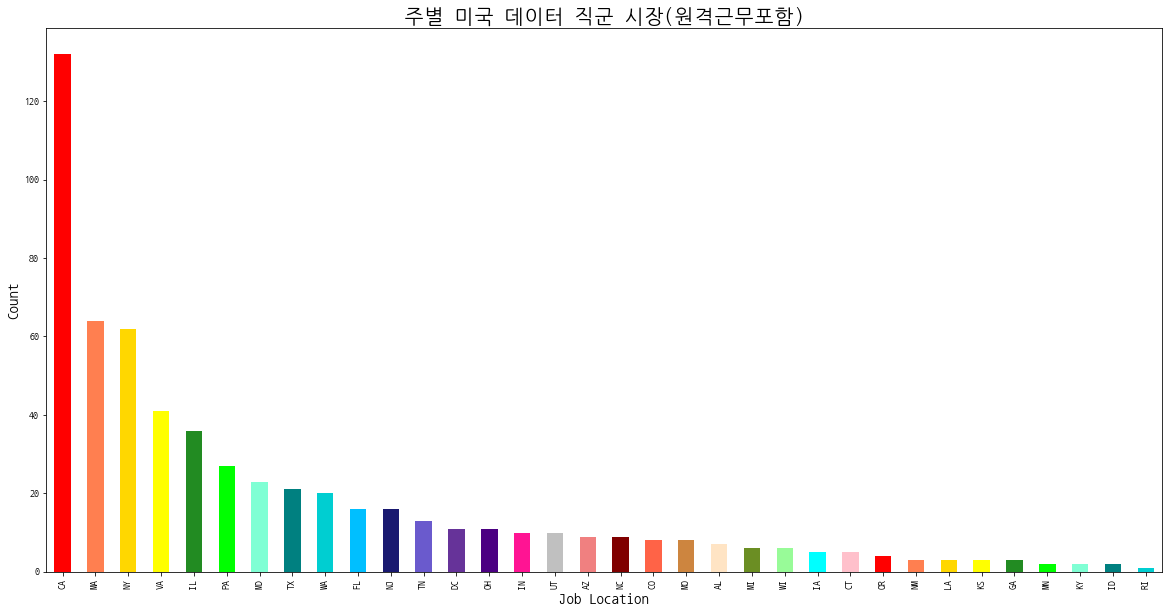

In [9]:
plt.figure(figsize=(20,10))
ax=STA_count["Job_Title"].sort_values(ascending=False).plot(kind="bar",color=['red', 'coral', 'gold', 'yellow', 'forestgreen',
                                                                             "lime",'aquamarine','teal','darkturquoise','deepskyblue',
                                                                             'midnightblue','slateblue','rebeccapurple','indigo','deeppink',
                                                                             'silver','lightcoral','maroon','tomato',"peru",
                                                                             'bisque','olivedrab','palegreen',"cyan","pink"])
#plt.tight_layout()
plt.title("주별 미국 데이터 직군 시장(원격근무포함)",fontsize=20)
plt.xlabel("Job Location",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

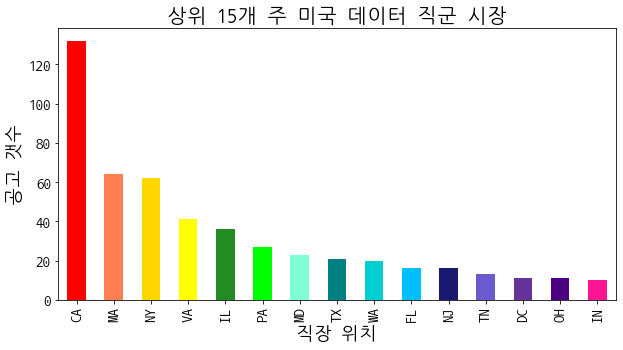

In [10]:
plt.figure(figsize=(10,5))
ax1=STA_count["Job_Title"].sort_values(ascending=False).head(15).plot(kind="bar",color=['red', 'coral', 'gold', 'yellow', 'forestgreen',
                                                                             "lime",'aquamarine','teal','darkturquoise','deepskyblue',
                                                                             'midnightblue','slateblue','rebeccapurple','indigo','deeppink'])
plt.title("상위 15개 주 미국 데이터 직군 시장",fontsize=20)
plt.xlabel("직장 위치",fontsize=18)
plt.ylabel("공고 갯수",fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

In [11]:
job_count=pd.DataFrame(STA_count["Job_Title"].sort_values(ascending=False))
job_count

,Job_Title
Job Location,
CA,132
MA,64
NY,62
VA,41
IL,36
PA,27
MD,23
TX,21
WA,20


### 데이터 직군 직무 유형 수치 맵핑

In [12]:
job_series = datajob.groupby('Job Location')["Job_Type"].count()
job_df = pd.DataFrame((job_series).sort_values(ascending = True))
job_df.head()
job_df1 = job_df.reset_index(inplace = False)
job_df1



,Job Location,Job_Type
0,RI,1
1,MN,2
2,ID,2
3,KY,2
4,NM,3
5,GA,3
6,LA,3
7,KS,3
8,OR,4
9,CT,5


In [13]:
job_series = datajob.groupby('Job Location')['Job_Type'].count()
job_df = pd.DataFrame(job_series)
job_df.reset_index(inplace = True)
job_df['Job_Type'].sort_values(ascending=True)

#https://wellsr.com/python/creating-python-choropleth-maps-with-plotly/
#   (pip install plotly_express)  #실행해줄것
import plotly.express as px  # express 임포트 해줄것
fig = px.choropleth(job_df,  # 판다스 데이터 프레임 입력
                   locations='Job Location',  # 컬럼과 위치 데이터 프레임
                   color='Job_Type',  # 컬럼과 컬러변수 데이터 프레임
                   hover_name='Job_Type', # 컬럼 hover 정보 데이터 프레임
                   locationmode = 'USA-states',
                   color_continuous_scale='YlOrRd'
                   )
                  #color_continuous_scale=px.colors.diverging.RdYlGn[::-1]) # 플롯 미국으로 설정
fig.update_layout(
   title_text = '미국의 데이터 직군직무 분포', # 제목 생성
   geo_scope='usa',  # 글로벌에서 미국 지도만 플롯팅
)
fig.show()  # 지도출력

In [14]:
datajob_STATE=datajob.set_index(["Job Location"])

In [15]:
datajob_STATE.head(3)

,index,Job_Title,Queried_Salary,Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Age,Python,R,scala,spark,aws,excel,sql,sas,ML,hadoop,tableau,flink,mongo,google_an,Job_Type,seniority_by_title,AL,AZ,...,MD,MI,MN,MO,NC,NE,NJ,NM,NY,OH,OR,PA,RI,SC,TN,TX,UT,VA,WA,WI,Industry.1,항공우주공학,농업,금융서비스,IT산업,건설,비즈니스,교육,에너지,정부,의료,제조,보험,방송,부동산,운송,Degree,m,p,both
Job Location,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NM,0,Data Scientist,53000-91000,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,48,1,0,0,0,0,1,0,1,1,0,1,0,0,0,Data Scientist,na,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Aerospace & Defense,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,both,0,0,1
MD,1,Healthcare Data Scientist,63000-112000,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,37,1,1,0,0,0,0,0,0,1,0,0,0,0,0,Data Scientist,na,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Health Care Services & Hospitals,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,M,1,0,0
FL,2,Data Scientist,80000-90000,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4,11,1,0,0,1,0,1,1,1,1,0,0,0,0,0,Data Scientist,na,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Security Services,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,M,1,0,0


In [16]:
base = datajob_STATE['Queried_Salary'].str.split('-')
base

Job Location
NM     [53000, 91000]
MD    [63000, 112000]
FL     [80000, 90000]
WA     [56000, 97000]
NY    [86000, 143000]
           ...       
MA    [37000, 100000]
CA    [62000, 113000]
PA    [86000, 137000]
TN    [72000, 133000]
PA    [95000, 160000]
Name: Queried_Salary, Length: 599, dtype: object

In [17]:


entry = []
mid = []
senior = []
for i in range(len(base)):
    if int(base[i][1]) < 80000:
        datajob_STATE.iloc[i, 2] = '<80000'
    elif int(base[i][1]) < 99999:
        datajob_STATE.iloc[i, 2] = '80000-99999'
    elif int(base[i][1]) < 119999:
        datajob_STATE.iloc[i, 2] = '100000-119999'
    elif int(base[i][1]) < 139999:
        datajob_STATE.iloc[i, 2] = '120000-139999'
    elif int(base[i][1]) < 159999:
        datajob_STATE.iloc[i, 2] = '140000-159999'
    elif int(base[i][1]) >= 160000:
        datajob_STATE.iloc[i, 2] = '>160000'

In [18]:
datajob_STATE.head(3)

,index,Job_Title,Queried_Salary,Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Age,Python,R,scala,spark,aws,excel,sql,sas,ML,hadoop,tableau,flink,mongo,google_an,Job_Type,seniority_by_title,AL,AZ,...,MD,MI,MN,MO,NC,NE,NJ,NM,NY,OH,OR,PA,RI,SC,TN,TX,UT,VA,WA,WI,Industry.1,항공우주공학,농업,금융서비스,IT산업,건설,비즈니스,교육,에너지,정부,의료,제조,보험,방송,부동산,운송,Degree,m,p,both
Job Location,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NM,0,Data Scientist,80000-99999,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,48,1,0,0,0,0,1,0,1,1,0,1,0,0,0,Data Scientist,na,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Aerospace & Defense,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,both,0,0,1
MD,1,Healthcare Data Scientist,100000-119999,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,37,1,1,0,0,0,0,0,0,1,0,0,0,0,0,Data Scientist,na,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Health Care Services & Hospitals,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,M,1,0,0
FL,2,Data Scientist,80000-99999,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4,11,1,0,0,1,0,1,1,1,1,0,0,0,0,0,Data Scientist,na,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Security Services,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,M,1,0,0


In [19]:
#데이터 전처리: Queryed_Salary 컬럼에서 연산자와 제거 및 연봉 평균 신규변수로 연봉 컬럼 신규 추가
datajob_STATE["Salary"]=datajob_STATE["Queried_Salary"].str.replace("<","")
datajob_STATE["Salary"]=datajob_STATE["Queried_Salary"].str.replace(">","")
datajob_STATE["Salary"]=datajob_STATE["Queried_Salary"].str.replace('80000-99999',"84999")
datajob_STATE["Salary"]=datajob_STATE["Queried_Salary"].str.replace("100000-119999","109999")
datajob_STATE["Salary"]=datajob_STATE["Queried_Salary"].str.replace("120000-139999","129999")
datajob_STATE["Salary"]=datajob_STATE["Queried_Salary"].str.replace("140000-159999","149999")
datajob_STATE.head(3)

,index,Job_Title,Queried_Salary,Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Age,Python,R,scala,spark,aws,excel,sql,sas,ML,hadoop,tableau,flink,mongo,google_an,Job_Type,seniority_by_title,AL,AZ,...,MI,MN,MO,NC,NE,NJ,NM,NY,OH,OR,PA,RI,SC,TN,TX,UT,VA,WA,WI,Industry.1,항공우주공학,농업,금융서비스,IT산업,건설,비즈니스,교육,에너지,정부,의료,제조,보험,방송,부동산,운송,Degree,m,p,both,Salary
Job Location,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NM,0,Data Scientist,80000-99999,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,48,1,0,0,0,0,1,0,1,1,0,1,0,0,0,Data Scientist,na,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Aerospace & Defense,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,both,0,0,1,80000-99999
MD,1,Healthcare Data Scientist,100000-119999,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,37,1,1,0,0,0,0,0,0,1,0,0,0,0,0,Data Scientist,na,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Health Care Services & Hospitals,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,M,1,0,0,100000-119999
FL,2,Data Scientist,80000-99999,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4,11,1,0,0,1,0,1,1,1,1,0,0,0,0,0,Data Scientist,na,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Security Services,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,M,1,0,0,80000-99999


In [20]:
datajob_STATE["Salary"]=datajob_STATE["Salary"].str.replace("<","")
datajob_STATE["Salary"]=datajob_STATE["Salary"].str.replace(">","")
datajob_STATE["Salary"]=datajob_STATE["Salary"].str.replace('80000-99999',"84999")
datajob_STATE["Salary"]=datajob_STATE["Salary"].str.replace("100000-119999","109999")
datajob_STATE["Salary"]=datajob_STATE["Salary"].str.replace("120000-139999","129999")
datajob_STATE["Salary"]=datajob_STATE["Salary"].str.replace("140000-159999","149999")
datajob_STATE.head(3)

,index,Job_Title,Queried_Salary,Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Age,Python,R,scala,spark,aws,excel,sql,sas,ML,hadoop,tableau,flink,mongo,google_an,Job_Type,seniority_by_title,AL,AZ,...,MI,MN,MO,NC,NE,NJ,NM,NY,OH,OR,PA,RI,SC,TN,TX,UT,VA,WA,WI,Industry.1,항공우주공학,농업,금융서비스,IT산업,건설,비즈니스,교육,에너지,정부,의료,제조,보험,방송,부동산,운송,Degree,m,p,both,Salary
Job Location,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NM,0,Data Scientist,80000-99999,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,48,1,0,0,0,0,1,0,1,1,0,1,0,0,0,Data Scientist,na,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Aerospace & Defense,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,both,0,0,1,84999
MD,1,Healthcare Data Scientist,100000-119999,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,37,1,1,0,0,0,0,0,0,1,0,0,0,0,0,Data Scientist,na,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Health Care Services & Hospitals,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,M,1,0,0,109999
FL,2,Data Scientist,80000-99999,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4,11,1,0,0,1,0,1,1,1,1,0,0,0,0,0,Data Scientist,na,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Security Services,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,M,1,0,0,84999


In [21]:
#연봉변수 int 변경 및 평균 변수 지정
datajob_STATE["Salary"]=datajob_STATE["Salary"].astype(int)
state_avg_salary=datajob_STATE.groupby(datajob_STATE.index).mean().round(2)["Salary"].sort_values(ascending=False)
state_salary=pd.DataFrame(state_avg_salary)
state_salary.head(20)

,Salary
Job Location,
CA,139810.17
NC,137776.89
IL,134166.11
RI,129999.00
MD,128694.87
MA,127968.03
MI,126665.67
NJ,125624.44
PA,125184.63


In [22]:
# 직업/직무 유형(파이 차트)
count_of_jobstypes=datajob['Job_Type'].value_counts()
count_of_jobstypes_df=pd.DataFrame(count_of_jobstypes)

#count_of_jobstypes_df.index.name="JobType"
count_of_jobstypes_df

,Job_Type
Data Scientist,366
data engineer,119
Data Analyst,114


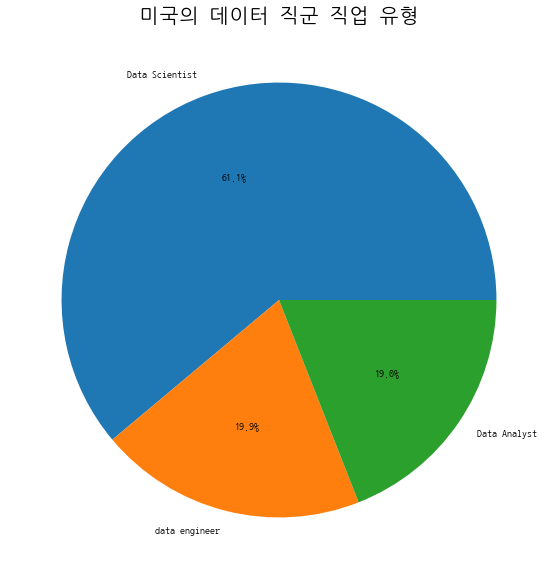

In [23]:
plt.figure(figsize=(10, 10))
plt.pie(count_of_jobstypes_df['Job_Type'],labels=count_of_jobstypes_df.index,autopct="%1.1f%%")
plt.title("미국의 데이터 직군 직업 유형", fontsize=20)
plt.rcParams['font.size'] = 20
plt.show()

In [24]:
#상위 10개 기업(막대 차트)
count_of_company=datajob['company_txt'].value_counts()
count_of_company_df=pd.DataFrame(count_of_company)
new_company_count_df=count_of_company_df.head(10)
new_company_count_df

,company_txt
MassMutual,14
Liberty Mutual Insurance,10
PNNL,10
MITRE,8
Novartis,7
Software Engineering Institute,7
"Numeric, LLC",7
Fareportal,7
Pfizer,7
The Church of Jesus Christ of Latter-day Saints,6


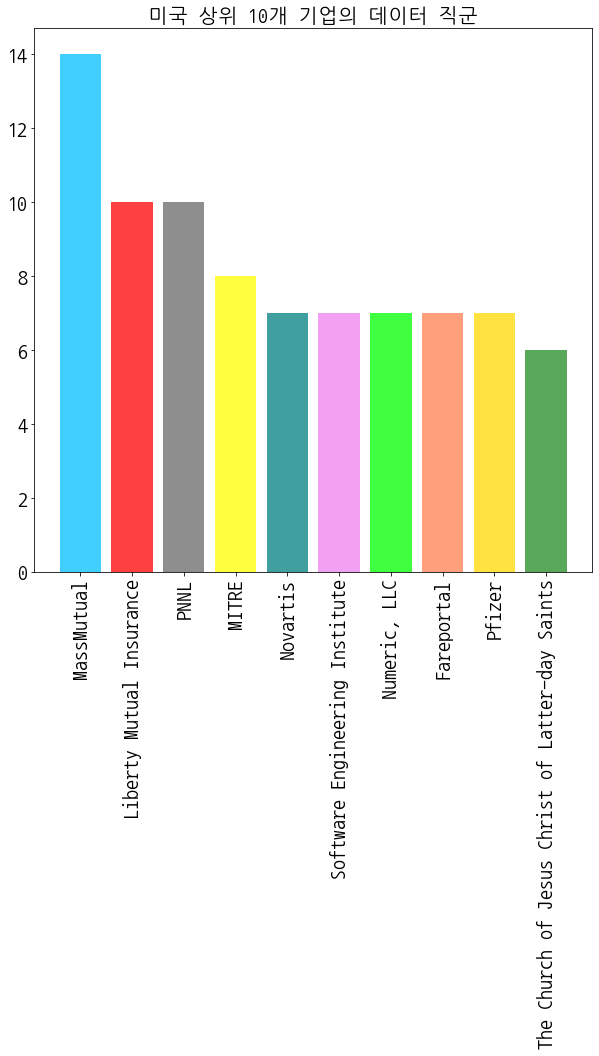

In [25]:
x_axis=np.arange(len(new_company_count_df))
plt.figure(figsize=(10, 10))
tick_locations=[value for value in x_axis]
plt.xticks(tick_locations,new_company_count_df.index,rotation=90)
plt.title("미국 상위 10개 기업의 데이터 직군",fontsize="20")
plt.bar(x_axis,new_company_count_df['company_txt'],alpha=0.75,align="center",color=['deepskyblue','red','dimgray','yellow','teal','violet',"lime",
                                                                                 'coral', 'gold',  'forestgreen',
                                                                             ])

plt.show()

In [26]:
company_indus_series =datajob['Industry'].value_counts()
company_indus_df = pd.DataFrame(company_indus_series)
company_indus_df.index.name= 'Industry Name'
company_indus_df
new_index_indus = company_indus_df.reset_index()
industry_df = new_index_indus.rename(columns={'Company_Industry':'Available Jobs'})
industry_df

,Industry Name,Industry
0,Insurance Carriers,63
1,Computer Hardware & Software,58
2,Biotech & Pharmaceuticals,52
3,IT Services,49
4,Enterprise Software & Network Solutions,42
5,Consulting,29
6,Internet,29
7,Advertising & Marketing,25
8,Health Care Services & Hospitals,24
9,Aerospace & Defense,23


In [27]:
industry_df.head(10)

,Industry Name,Industry
0,Insurance Carriers,63
1,Computer Hardware & Software,58
2,Biotech & Pharmaceuticals,52
3,IT Services,49
4,Enterprise Software & Network Solutions,42
5,Consulting,29
6,Internet,29
7,Advertising & Marketing,25
8,Health Care Services & Hospitals,24
9,Aerospace & Defense,23


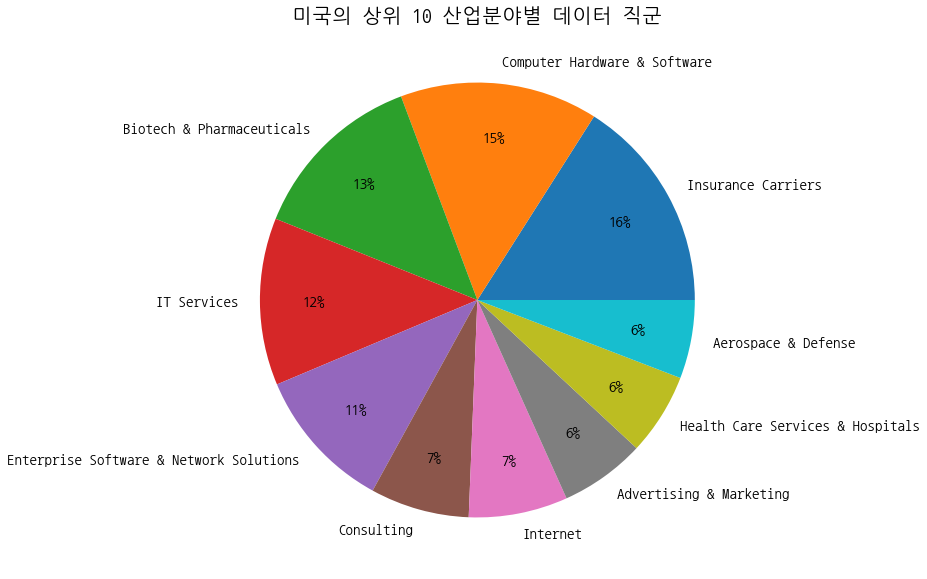

In [28]:
industry_df =industry_df.head(10)
industry_df
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_title('미국의 상위 10 산업분야별 데이터 직군',fontsize="20")
plt.pie(industry_df['Industry'] , autopct = '%0.f%%',pctdistance=0.75,textprops={'fontsize': 15},
       labels = industry_df['Industry Name']);

In [29]:
#요약끝

In [30]:
datajob.columns

Index(['index', 'Job_Title', 'Queried_Salary', 'Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary',
       'Avg Salary(K)', 'company_txt', 'Age', 'Python', 'R', 'scala', 'spark',
       'aws', 'excel', 'sql', 'sas', 'ML', 'hadoop', 'tableau', 'flink',
       'mongo', 'google_an', 'Job_Type', 'seniority_by_title', 'Job Location',
       'AL', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'IA', 'ID', 'IL',
       'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'MI', 'MN', 'MO', 'NC', 'NE', 'NJ',
       'NM', 'NY', 'OH', 'OR', 'PA', 'RI', 'SC', 'TN', 'TX', 'UT', 'VA', 'WA',
       'WI', 'Industry.1', '항공우주공학', '농업', '금융서비스', 'IT산업', '건설', '비즈니스', '교육',
       '에너지', '정부', '의료', '제조', '보험', '방송', '부동산', '운송', 'Degree', 'm', 'p',
       'both'],
      dtype='object')

In [31]:
datajob_salary=datajob[['Queried_Salary',"Job_Type" ,'Python', 'R', 'scala', 'spark',
       'aws', 'excel', 'sql', 'sas', 'ML', 'hadoop', 'tableau', 'flink',
       'mongo', 'google_an']]
datajob_salary

,Queried_Salary,Job_Type,Python,R,scala,spark,aws,excel,sql,sas,ML,hadoop,tableau,flink,mongo,google_an
0,53000-91000,Data Scientist,1,0,0,0,0,1,0,1,1,0,1,0,0,0
1,63000-112000,Data Scientist,1,1,0,0,0,0,0,0,1,0,0,0,0,0
2,80000-90000,Data Scientist,1,0,0,1,0,1,1,1,1,0,0,0,0,0
3,56000-97000,Data Scientist,1,1,0,0,0,0,0,0,1,0,0,0,0,0
4,86000-143000,Data Scientist,1,0,0,0,0,1,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,37000-100000,Data Scientist,0,1,0,0,0,1,0,0,0,0,0,0,0,0
595,62000-113000,data engineer,1,1,1,0,1,1,1,0,0,0,0,0,0,0
596,86000-137000,Data Scientist,0,1,0,0,0,0,0,0,1,0,0,0,0,0
597,72000-133000,data engineer,1,1,1,1,1,0,1,0,1,1,0,0,0,0


In [32]:
datajob_salary

,Queried_Salary,Job_Type,Python,R,scala,spark,aws,excel,sql,sas,ML,hadoop,tableau,flink,mongo,google_an
0,53000-91000,Data Scientist,1,0,0,0,0,1,0,1,1,0,1,0,0,0
1,63000-112000,Data Scientist,1,1,0,0,0,0,0,0,1,0,0,0,0,0
2,80000-90000,Data Scientist,1,0,0,1,0,1,1,1,1,0,0,0,0,0
3,56000-97000,Data Scientist,1,1,0,0,0,0,0,0,1,0,0,0,0,0
4,86000-143000,Data Scientist,1,0,0,0,0,1,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,37000-100000,Data Scientist,0,1,0,0,0,1,0,0,0,0,0,0,0,0
595,62000-113000,data engineer,1,1,1,0,1,1,1,0,0,0,0,0,0,0
596,86000-137000,Data Scientist,0,1,0,0,0,0,0,0,1,0,0,0,0,0
597,72000-133000,data engineer,1,1,1,1,1,0,1,0,1,1,0,0,0,0


In [33]:
datajob_salary['Job_Type'].unique()

array(['Data Scientist', 'Data Analyst', 'data engineer'], dtype=object)

In [34]:
datajob_salary=datajob[['Queried_Salary',"Job_Type" ,'Python', 'R', 'scala', 'spark',
       'aws', 'excel', 'sql', 'sas', 'ML', 'hadoop', 'tableau', 'flink',
       'mongo', 'google_an']]

data_ana=datajob_salary[datajob_salary["Job_Type"]=="Data Analyst"].drop("Queried_Salary",axis=1)
data_ana.head()

,Job_Type,Python,R,scala,spark,aws,excel,sql,sas,ML,hadoop,tableau,flink,mongo,google_an
12,Data Analyst,1,1,0,1,1,1,1,0,0,0,1,0,0,0
25,Data Analyst,0,1,0,0,0,1,0,0,0,0,0,0,0,0
33,Data Analyst,1,1,0,0,0,1,1,0,0,0,1,0,0,0
38,Data Analyst,1,1,1,0,1,1,1,0,0,0,1,0,1,0
44,Data Analyst,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [35]:
data_eng=datajob_salary[datajob_salary["Job_Type"]=="data engineer"].drop("Queried_Salary",axis=1)
data_eng.head()

,Job_Type,Python,R,scala,spark,aws,excel,sql,sas,ML,hadoop,tableau,flink,mongo,google_an
14,data engineer,0,0,1,0,0,1,0,0,0,0,0,0,0,0
37,data engineer,1,1,0,0,0,1,1,0,0,0,0,0,0,0
39,data engineer,0,1,0,0,0,1,1,0,1,0,0,0,0,0
77,data engineer,1,1,1,0,1,1,1,0,0,0,0,0,0,0
95,data engineer,1,1,1,1,0,0,1,0,0,0,1,0,0,0


In [36]:
data_sci=datajob_salary[datajob_salary["Job_Type"]=="Data Scientist"].drop("Queried_Salary",axis=1)
data_sci.head()

,Job_Type,Python,R,scala,spark,aws,excel,sql,sas,ML,hadoop,tableau,flink,mongo,google_an
0,Data Scientist,1,0,0,0,0,1,0,1,1,0,1,0,0,0
1,Data Scientist,1,1,0,0,0,0,0,0,1,0,0,0,0,0
2,Data Scientist,1,0,0,1,0,1,1,1,1,0,0,0,0,0
3,Data Scientist,1,1,0,0,0,0,0,0,1,0,0,0,0,0
4,Data Scientist,1,0,0,0,0,1,1,1,1,0,0,0,0,0


In [37]:
jobs_df = datajob.set_index('Job_Type')
jobs_df_skill = jobs_df.loc[['Data Scientist','data engineer','Data Analyst'],
                            ['Python', 'R', 'scala', 'spark',
       'aws', 'excel', 'sql', 'sas', 'ML', 'hadoop', 'tableau', 'flink',
       'mongo', 'google_an']]
jobs_groups = jobs_df_skill.groupby('Job_Type')
jobs_groups.sum()

,Python,R,scala,spark,aws,excel,sql,sas,ML,hadoop,tableau,flink,mongo,google_an
Job_Type,,,,,,,,,,,,,,
Data Analyst,38,74,15,7,12,85,83,13,26,4,44,0,3,11
Data Scientist,266,278,71,93,91,184,207,50,271,70,93,4,21,3
data engineer,77,92,59,67,59,54,87,1,47,50,11,6,13,0


In [38]:
print ("데이터 분석가 상위 4개 기술역량")
print("----------------------------------")
print(f'SQL): {sum(data_ana["sql"]==1)}')
print(f'R): {sum(data_ana["R"]==1)}')
print(f'Tableau): {sum(data_ana["tableau"]==1)}')
print(f'Python): {sum(data_ana["Python"]==1)}')
print("------------------------------------")
print("데이터 분석가 추가 기술역량")
print("------------------------------------")
print(f'scala): {sum(data_ana["scala"]==1)}')
print(f'SAS): {sum(data_ana["sas"]==1)}')
print(f'aws): {sum(data_ana["aws"]==1)}')
print(f'google_an): {sum(data_ana["google_an"]==1)}')
print(f'Spark): {sum(data_ana["spark"]==1)}')
print(f'Hadoop): {sum(data_ana["hadoop"]==1)}')
print(f'mongo): {sum(data_ana["mongo"]==1)}')
print(f'ML): {sum(data_ana["ML"]==1)}')
print(f'flink): {sum(data_ana["flink"]==1)}')
print("------------------------------------")
print("데이터 분석가 추가 기술역량")
print("------------------------------------")
print(f'excel): {sum(data_ana["excel"]==1)}')


데이터 분석가 상위 4개 기술역량
----------------------------------
SQL): 83
R): 74
Tableau): 44
Python): 38
------------------------------------
데이터 분석가 추가 기술역량
------------------------------------
scala): 15
SAS): 13
aws): 12
google_an): 11
Spark): 7
Hadoop): 4
mongo): 3
ML): 26
flink): 0
------------------------------------
데이터 분석가 추가 기술역량
------------------------------------
excel): 85


In [39]:
print ("데이터 엔지니어 상위 4개 기술역량")
print("----------------------------------")
print(f'R): {sum(data_eng["R"]==1)}')
print(f'SQL): {sum(data_eng["sql"]==1)}')
print(f'Python): {sum(data_eng["Python"]==1)}')
print(f'Spark): {sum(data_eng["spark"]==1)}')
print("------------------------------------")
print("데이터 엔지니어 추가 기술역량")
print("------------------------------------")
print(f'scala): {sum(data_eng["scala"]==1)}')
print(f'aws): {sum(data_eng["aws"]==1)}')
print(f'Hadoop): {sum(data_eng["hadoop"]==1)}')
print(f'mongo): {sum(data_eng["mongo"]==1)}')
print(f'Tableau): {sum(data_eng["tableau"]==1)}')
print(f'flink): {sum(data_eng["flink"]==1)}')
print(f'SAS): {sum(data_eng["sas"]==1)}')
print(f'google_an): {sum(data_eng["google_an"]==1)}')
print(f'ML): {sum(data_eng["ML"]==1)}')
print("------------------------------------")
print("추가필요역량")
print("------------------------------------")
print(f'excel): {sum(data_eng["excel"]==1)}')

데이터 엔지니어 상위 4개 기술역량
----------------------------------
R): 92
SQL): 87
Python): 77
Spark): 67
------------------------------------
데이터 엔지니어 추가 기술역량
------------------------------------
scala): 59
aws): 59
Hadoop): 50
mongo): 13
Tableau): 11
flink): 6
SAS): 1
google_an): 0
ML): 47
------------------------------------
추가필요역량
------------------------------------
excel): 54


In [40]:
print ("데이터 과학자 상위 4개 기술역량")
print("----------------------------------")
print(f'R): {sum(data_sci["R"]==1)}')
print(f'Python): {sum(data_sci["Python"]==1)}')
print(f'SQL): {sum(data_sci["sql"]==1)}')
print(f'Spark): {sum(data_sci["spark"]==1)}')
print("------------------------------------")
print("데이터 과학자 추가 기술역량")
print("------------------------------------")
print(f'Tableau): {sum(data_sci["tableau"]==1)}')
print(f'aws): {sum(data_sci["aws"]==1)}')
print(f'scala): {sum(data_sci["scala"]==1)}')
print(f'Hadoop): {sum(data_sci["hadoop"]==1)}')
print(f'SAS): {sum(data_sci["sas"]==1)}')
print(f'mongo): {sum(data_sci["mongo"]==1)}')
print(f'flink): {sum(data_sci["flink"]==1)}')
print(f'google_an): {sum(data_sci["google_an"]==1)}')
print(f'ML): {sum(data_sci["ML"]==1)}')
print("------------------------------------")
print("추가필요기술역량")
print("------------------------------------")
print(f'excel): {sum(data_sci["excel"]==1)}')

데이터 과학자 상위 4개 기술역량
----------------------------------
R): 278
Python): 266
SQL): 207
Spark): 93
------------------------------------
데이터 과학자 추가 기술역량
------------------------------------
Tableau): 93
aws): 91
scala): 71
Hadoop): 70
SAS): 50
mongo): 21
flink): 4
google_an): 3
ML): 271
------------------------------------
추가필요기술역량
------------------------------------
excel): 184


In [41]:
# 'Python', 'R', 'scala', 'spark', 'aws', 'excel', 'sql', 'sas', 'ML', 'hadoop', 'tableau', 'flink', 'mongo', 'google_an'

In [42]:
jobs_groups.sum()

,Python,R,scala,spark,aws,excel,sql,sas,ML,hadoop,tableau,flink,mongo,google_an
Job_Type,,,,,,,,,,,,,,
Data Analyst,38,74,15,7,12,85,83,13,26,4,44,0,3,11
Data Scientist,266,278,71,93,91,184,207,50,271,70,93,4,21,3
data engineer,77,92,59,67,59,54,87,1,47,50,11,6,13,0


In [43]:
temp = jobs_groups.sum()

In [44]:
temp.iloc[0, :].values.astype(int)

array([38, 74, 15,  7, 12, 85, 83, 13, 26,  4, 44,  0,  3, 11])

In [45]:
temp.iloc[1, :].values.astype(int)

array([266, 278,  71,  93,  91, 184, 207,  50, 271,  70,  93,   4,  21,
         3])

In [46]:
temp.iloc[2, :].values.astype(int)

array([77, 92, 59, 67, 59, 54, 87,  1, 47, 50, 11,  6, 13,  0])

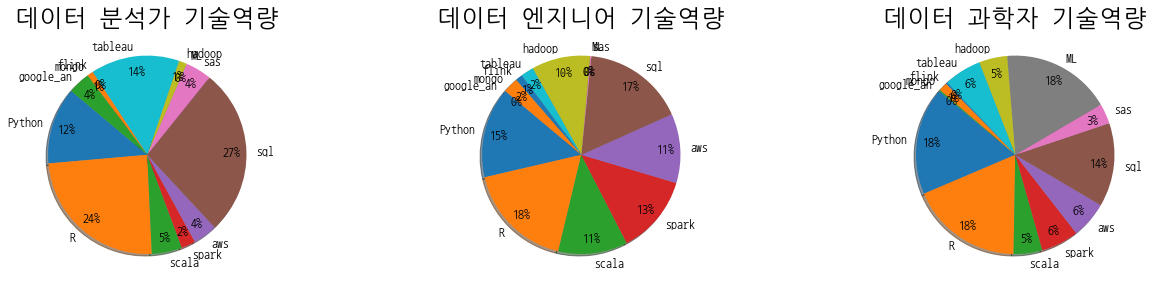

In [47]:
fig, axes = plt.subplots(1, 3,figsize=(20, 15))
labels1=['Python', 'R', 'scala', 'spark', 'aws', 'sql', 'sas', 'ML', 'hadoop', 'tableau', 'flink', 'mongo', 'google_an']
sizes1 =[38, 74, 15, 7, 12,  83, 13, 0, 4, 44, 0, 3, 11]
sizes2 =[77, 92, 59, 67, 59,  87,  1, 0, 50, 11,  6, 13, 0]
sizes3= [266, 278, 71, 93,  91,  207, 50, 271, 70, 93, 4, 21, 3]
axes[0].pie(sizes1, labels=labels1,autopct='%.0f%%',textprops={'fontsize': 12},
                            shadow=True,pctdistance=0.85, startangle=140)
axes[0].set_title('데이터 분석가 기술역량')
axes[1].pie(sizes2, labels=labels1,autopct='%.0f%%',textprops={'fontsize': 12},
                   shadow=True,pctdistance=0.85,startangle=140 )
axes[1].set_title('데이터 엔지니어 기술역량')
axes[2].pie(sizes3, labels=labels1,autopct='%.0f%%',textprops={'fontsize': 12},
                            shadow=True,pctdistance=0.85,startangle=140 )
axes[2].set_title('데이터 과학자 기술역량')

fig.subplots_adjust(wspace=0.75)

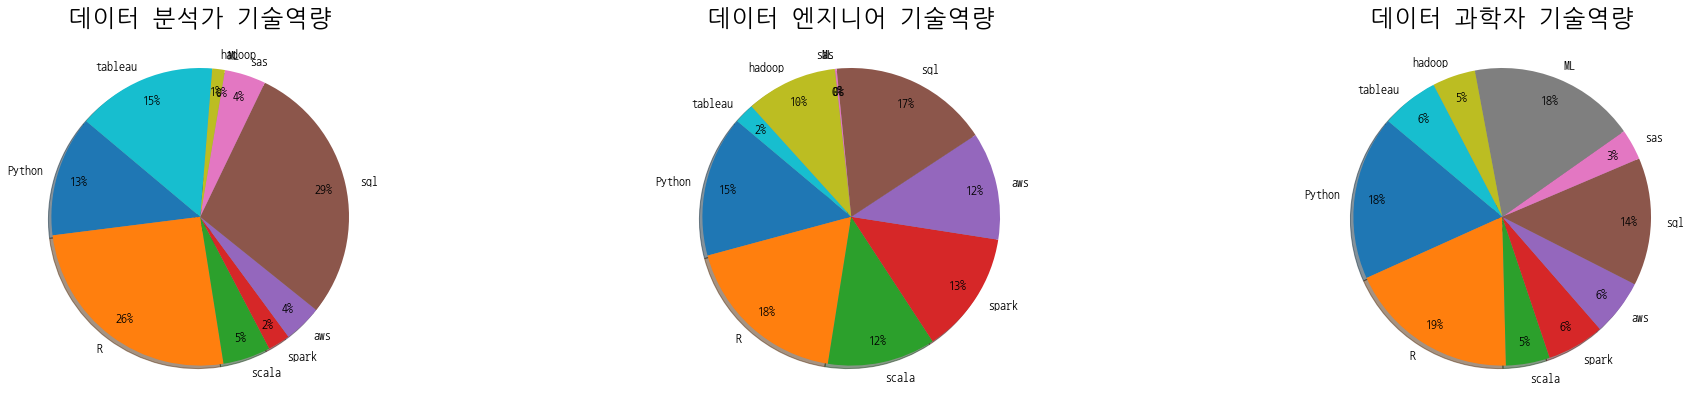

In [48]:
fig, axes = plt.subplots(1, 3,figsize=(30, 20))
labels1=['Python', 'R', 'scala', 'spark', 'aws', 'sql', 'sas', 'ML', 'hadoop', 'tableau']
sizes1 =[38, 74, 15, 7, 12,  83, 13, 0, 4, 44]
sizes2 =[77, 92, 59, 67, 59,  87,  1, 0, 50, 11]
sizes3= [266, 278, 71, 93,  91,  207, 50, 271, 70, 93]
axes[0].pie(sizes1, labels=labels1,autopct='%.0f%%',textprops={'fontsize': 12},
                            shadow=True,pctdistance=0.85, startangle=140)
axes[0].set_title('데이터 분석가 기술역량')
axes[1].pie(sizes2, labels=labels1,autopct='%.0f%%',textprops={'fontsize': 12},
                   shadow=True,pctdistance=0.85,startangle=140 )
axes[1].set_title('데이터 엔지니어 기술역량')
axes[2].pie(sizes3, labels=labels1,autopct='%.0f%%',textprops={'fontsize': 12},
                            shadow=True,pctdistance=0.85,startangle=140 )
axes[2].set_title('데이터 과학자 기술역량')

fig.subplots_adjust(wspace=0.75)

In [49]:
base = datajob['Queried_Salary'].str.split('-')
base

0       [53000, 91000]
1      [63000, 112000]
2       [80000, 90000]
3       [56000, 97000]
4      [86000, 143000]
            ...       
594    [37000, 100000]
595    [62000, 113000]
596    [86000, 137000]
597    [72000, 133000]
598    [95000, 160000]
Name: Queried_Salary, Length: 599, dtype: object

In [50]:
datajob.columns

Index(['index', 'Job_Title', 'Queried_Salary', 'Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary',
       'Avg Salary(K)', 'company_txt', 'Age', 'Python', 'R', 'scala', 'spark',
       'aws', 'excel', 'sql', 'sas', 'ML', 'hadoop', 'tableau', 'flink',
       'mongo', 'google_an', 'Job_Type', 'seniority_by_title', 'Job Location',
       'AL', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'IA', 'ID', 'IL',
       'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'MI', 'MN', 'MO', 'NC', 'NE', 'NJ',
       'NM', 'NY', 'OH', 'OR', 'PA', 'RI', 'SC', 'TN', 'TX', 'UT', 'VA', 'WA',
       'WI', 'Industry.1', '항공우주공학', '농업', '금융서비스', 'IT산업', '건설', '비즈니스', '교육',
       '에너지', '정부', '의료', '제조', '보험', '방송', '부동산', '운송', 'Degree', 'm', 'p',
       'both'],
      dtype='object')

In [51]:
entry = []
mid = []
senior = []
for i in range(len(base)):
    if int(base[i][1]) < 80000:
        datajob.iloc[i, 2] = '<80000'
    elif int(base[i][1]) < 99999:
        datajob.iloc[i, 2] = '80000-99999'
    elif int(base[i][1]) < 119999:
        datajob.iloc[i, 2] = '100000-119999'
    elif int(base[i][1]) < 139999:
        datajob.iloc[i, 2] = '120000-139999'
    elif int(base[i][1]) < 159999:
        datajob.iloc[i, 2] = '140000-159999'
    elif int(base[i][1]) > 160000:
        datajob.iloc[i, 2] = '>160000'


In [52]:
datajob.Queried_Salary.unique()

array(['80000-99999', '100000-119999', '140000-159999', '120000-160000',
       '>160000', '120000-139999', '<80000', '150000-160000',
       '100000-160000', '97000-160000', '95000-160000'], dtype=object)

In [53]:
#신입~대리급 (entry level) 데이터 프레임 생성: (<80000-99999),  대리~과장급 레벨 (Mid level) 데이터 프레임:(100000-139999), 차장~이사급 (Senior level) 레벨 데이터 프레임: (140000->160000)
 
datajob_salary=datajob[['Queried_Salary',"Job_Type" ,'Python', 'R', 'scala', 'spark', 'aws', 'excel', 'sql', 'sas', 'ML', 'hadoop', 'tableau', 'flink', 'mongo', 'google_an']]

entry_level=datajob_salary[datajob_salary["Queried_Salary"]=="<80000"]
entry_level=entry_level.append(datajob_salary[datajob_salary["Queried_Salary"]=="80000-99999"])
entry_level=entry_level.drop("Job_Type",axis=1)


mid_level=datajob_salary[datajob_salary["Queried_Salary"]=="100000-119999"]
mid_level=mid_level.append(datajob_salary[datajob_salary["Queried_Salary"]=="120000-139999"])
mid_level=mid_level.drop("Job_Type",axis=1)

senior_level=datajob_salary[datajob_salary["Queried_Salary"]==">160000"]
senior_level=senior_level.append(datajob_salary[datajob_salary["Queried_Salary"]=="140000-159999"])
senior_level=senior_level.drop("Job_Type",axis=1)

In [54]:
entry_level.head()

,Queried_Salary,Python,R,scala,spark,aws,excel,sql,sas,ML,hadoop,tableau,flink,mongo,google_an
25,<80000,0,1,0,0,0,1,0,0,0,0,0,0,0,0
44,<80000,0,1,0,0,0,1,0,0,0,0,0,0,0,0
63,<80000,1,1,0,0,0,0,1,0,1,0,1,0,0,0
74,<80000,0,0,0,0,0,1,0,0,1,0,0,0,0,1
78,<80000,0,1,1,0,0,1,0,0,0,0,0,0,0,0


In [55]:
mid_level.head()

,Queried_Salary,Python,R,scala,spark,aws,excel,sql,sas,ML,hadoop,tableau,flink,mongo,google_an
1,100000-119999,1,1,0,0,0,0,0,0,1,0,0,0,0,0
5,100000-119999,1,1,0,0,1,1,1,0,1,0,0,0,1,0
10,100000-119999,0,1,0,0,0,0,1,0,1,1,0,0,0,0
17,100000-119999,1,0,1,0,0,1,1,0,1,0,0,0,0,0
19,100000-119999,0,1,1,0,0,1,0,0,1,0,0,0,0,0


In [56]:
senior_level.head()

,Queried_Salary,Python,R,scala,spark,aws,excel,sql,sas,ML,hadoop,tableau,flink,mongo,google_an
9,>160000,1,0,1,0,0,0,0,0,1,0,0,0,0,0
11,>160000,0,1,0,0,0,0,1,0,0,1,0,0,0,0
14,>160000,0,0,1,0,0,1,0,0,0,0,0,0,0,0
15,>160000,1,1,0,1,1,1,0,0,1,1,0,0,0,0
16,>160000,0,1,0,0,0,0,1,0,1,0,0,0,0,0


In [57]:
salary_df = datajob.set_index('Queried_Salary')
salary_df_skill = salary_df.loc[['<80000','80000-99999','100000-119999','120000-139999',
'140000-159999','>160000'],['Python', 'R', 'scala', 'spark', 'aws', 'excel', 'sql', 'sas', 'ML', 'hadoop', 'tableau', 'flink', 'mongo', 'google_an']]
salary_groups = salary_df_skill.groupby('Queried_Salary')
salary_groups.sum()

,Python,R,scala,spark,aws,excel,sql,sas,ML,hadoop,tableau,flink,mongo,google_an
Queried_Salary,,,,,,,,,,,,,,
100000-119999,62,72,28,26,20,58,68,6,51,34,20,0,6,3
120000-139999,78,82,18,36,38,53,79,14,74,28,37,3,10,1
140000-159999,67,64,31,34,28,36,56,5,57,19,18,2,10,0
80000-99999,46,59,20,19,13,53,55,15,33,8,34,0,2,0
<80000,18,46,4,4,8,53,43,4,12,2,19,0,1,9
>160000,104,113,42,46,50,62,73,20,109,30,17,5,8,1


In [58]:
salary_groups.sum().columns

Index(['Python', 'R', 'scala', 'spark', 'aws', 'excel', 'sql', 'sas', 'ML',
       'hadoop', 'tableau', 'flink', 'mongo', 'google_an'],
      dtype='object')

In [59]:
result = []
var_list = ['Python', 'R', 'scala', 'spark', 'aws', 'excel', 'sql', 'sas', 'ML', 'hadoop', 'tableau', 'flink', 'mongo', 'google_an']
for i in var_list:
    result.append([salary_groups.sum()[i].values.astype(int), i])

In [60]:
result

[[array([ 62,  78,  67,  46,  18, 104]), 'Python'],
 [array([ 72,  82,  64,  59,  46, 113]), 'R'],
 [array([28, 18, 31, 20,  4, 42]), 'scala'],
 [array([26, 36, 34, 19,  4, 46]), 'spark'],
 [array([20, 38, 28, 13,  8, 50]), 'aws'],
 [array([58, 53, 36, 53, 53, 62]), 'excel'],
 [array([68, 79, 56, 55, 43, 73]), 'sql'],
 [array([ 6, 14,  5, 15,  4, 20]), 'sas'],
 [array([ 51,  74,  57,  33,  12, 109]), 'ML'],
 [array([34, 28, 19,  8,  2, 30]), 'hadoop'],
 [array([20, 37, 18, 34, 19, 17]), 'tableau'],
 [array([0, 3, 2, 0, 0, 5]), 'flink'],
 [array([ 6, 10, 10,  2,  1,  8]), 'mongo'],
 [array([3, 1, 0, 0, 9, 1]), 'google_an']]

In [61]:
for i in result:
    print(f'{i[1]}:{i[0]}')

Python:[ 62  78  67  46  18 104]
R:[ 72  82  64  59  46 113]
scala:[28 18 31 20  4 42]
spark:[26 36 34 19  4 46]
aws:[20 38 28 13  8 50]
excel:[58 53 36 53 53 62]
sql:[68 79 56 55 43 73]
sas:[ 6 14  5 15  4 20]
ML:[ 51  74  57  33  12 109]
hadoop:[34 28 19  8  2 30]
tableau:[20 37 18 34 19 17]
flink:[0 3 2 0 0 5]
mongo:[ 6 10 10  2  1  8]
google_an:[3 1 0 0 9 1]


In [62]:
# 연봉 그룹화하여 각 급여 수준에 대한 직무기술 합계를 결정
#신입: (<80000-99999), 중급 :(100000-139999), 고급: (140000->160000)




#연봉별 요구 기술역량 데이터 프레임 생성
salary = datajob.set_index('Queried_Salary')
salary_skill_df= salary.loc[['<80000','80000-99999', '100000-119999','120000-139999','140000-159999','>160000'],
          ['Python', 'R', 'scala', 'spark', 'aws', 'sql', 'sas', 'ML', 'hadoop', 'tableau', 'flink', 'mongo', 'google_an']]
salary_groups = salary_skill_df.groupby('Queried_Salary')

skills_salary_df = pd.DataFrame({'Queried_Salary':['<80000','80000-99999','100000-119999','120000-139999','140000-159999','>160000'],
                               'Python':[ '62',  '78',  '67',  '46',  '18', '104'],
'R':[ '72',  '82',  '64' , '59',  '46', '113'],
'scala':['28', '18', '31' ,'20'  ,'4' ,'42'],
'spark':['26', '36' ,'34' ,'19' , '4', '46'],
'aws':['20' ,'38', '28', '13' , '8' ,'50'],
'excel':['58', '53', '36' ,'53' ,'53','62'],
'sql':['68', '79' ,'56' ,'55' ,'43' ,'73'],
'sas':[ '6' ,'14'  ,'5' ,'15' , '4', '20'],
'ML':[  '0',   '0' ,  '0' ,'271'  , '0' ,  '0'],
'hadoop':['34', '28', '19' , '8' , '2' ,'30'],
'tableau':['20', '37', '18', '34' ,'19', '17'],
'flink':['0' ,'3', '2', '0' ,'0', '5'],
'mongo':[ '6', '10', '10' , '2',  '1',  '8'],
'google_an':['3', '1' ,'0' ,'0' ,'9', '1'],
                               }
                              )
skills_salary_df=skills_salary_df.set_index("Queried_Salary")
skills_salary_df

,Python,R,scala,spark,aws,excel,sql,sas,ML,hadoop,tableau,flink,mongo,google_an
Queried_Salary,,,,,,,,,,,,,,
<80000,62,72,28,26,20,58,68,6,0,34,20,0,6,3
80000-99999,78,82,18,36,38,53,79,14,0,28,37,3,10,1
100000-119999,67,64,31,34,28,36,56,5,0,19,18,2,10,0
120000-139999,46,59,20,19,13,53,55,15,271,8,34,0,2,0
140000-159999,18,46,4,4,8,53,43,4,0,2,19,0,1,9
>160000,104,113,42,46,50,62,73,20,0,30,17,5,8,1


In [63]:
var_list

['Python',
 'R',
 'scala',
 'spark',
 'aws',
 'excel',
 'sql',
 'sas',
 'ML',
 'hadoop',
 'tableau',
 'flink',
 'mongo',
 'google_an']

In [64]:
entry_level.ML.reset_index().notnull()

,index,ML
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
...,...,...
150,True,True
151,True,True
152,True,True
153,True,True


In [65]:
for i in var_list:
    print(f'"{i}":[{entry_level[i].sum().astype(int)}, {mid_level[i].sum().astype(int)}, {senior_level[i].sum().astype(int)}]')

"Python":[64, 140, 171]
"R":[105, 154, 177]
"scala":[24, 46, 73]
"spark":[23, 62, 80]
"aws":[21, 58, 78]
"excel":[106, 111, 98]
"sql":[98, 147, 129]
"sas":[19, 20, 25]
"ML":[45, 125, 166]
"hadoop":[10, 62, 49]
"tableau":[53, 57, 35]
"flink":[0, 3, 7]
"mongo":[3, 16, 18]
"google_an":[9, 4, 1]


In [66]:
top_skill_jobs = pd.DataFrame({'Job Level':['Entry Level','Mid Level','Senior Level'],
                               "Python":[64, 140, 171],
"R":[105, 154, 177],
"scala":[24, 46, 73],
"spark":[23, 62, 80],
"aws":[21, 58, 78],
"excel":[106, 111, 98],
"sql":[98, 147, 129],
"sas":[19, 20, 25],
"ML":[271, 0, 0],
"hadoop":[10, 62, 49],
"tableau":[53, 57, 35],
"flink":[0, 3, 7],
"mongo":[3, 16, 18],
"google_an":[9, 4, 1] }
)
top_skill_jobs=top_skill_jobs.set_index("Job Level")
top_skill_jobs

,Python,R,scala,spark,aws,excel,sql,sas,ML,hadoop,tableau,flink,mongo,google_an
Job Level,,,,,,,,,,,,,,
Entry Level,64,105,24,23,21,106,98,19,271,10,53,0,3,9
Mid Level,140,154,46,62,58,111,147,20,0,62,57,3,16,4
Senior Level,171,177,73,80,78,98,129,25,0,49,35,7,18,1


In [67]:
entry_level.columns

Index(['Queried_Salary', 'Python', 'R', 'scala', 'spark', 'aws', 'excel',
       'sql', 'sas', 'ML', 'hadoop', 'tableau', 'flink', 'mongo', 'google_an'],
      dtype='object')

In [68]:
print ("초급연봉 수준 상위 4개 기술역량")
print("----------------------------------")
print(f'R): {sum(entry_level["R"]==1)}')
print(f'SQL): {sum(entry_level["sql"]==1)}')
print(f'Python): {sum(entry_level["Python"]==1)}')
print(f'Tableau): {sum(entry_level["tableau"]==1)}')
print("------------------------------------")
print("초급연봉 수준 추가 기술역량")
print("------------------------------------")
print(f'scala): {sum(entry_level["scala"]==1)}')
print(f'Spark): {sum(entry_level["spark"]==1)}')
print(f'aws): {sum(entry_level["aws"]==1)}')
print(f'SAS): {sum(entry_level["sas"]==1)}')
print(f'Hadoop): {sum(entry_level["hadoop"]==1)}')
print(f'mongo): {sum(entry_level["mongo"]==1)}')
print(f'flink): {sum(entry_level["flink"]==1)}')
print(f'google_an): {sum(entry_level["google_an"]==1)}')
print(f'ML): {sum(entry_level["ML"]==1)}')
print("------------------------------------")


초급연봉 수준 상위 4개 기술역량
----------------------------------
R): 105
SQL): 98
Python): 64
Tableau): 53
------------------------------------
초급연봉 수준 추가 기술역량
------------------------------------
scala): 24
Spark): 23
aws): 21
SAS): 19
Hadoop): 10
mongo): 3
flink): 0
google_an): 9
ML): 45
------------------------------------


In [69]:
print ("중급연봉 수준 상위 4개 기술역량")
print("----------------------------------")
print(f'R): {sum(mid_level["R"]==1)}')
print(f'SQL): {sum(mid_level["sql"]==1)}')
print(f'Python): {sum(mid_level["Python"]==1)}')
print(f'Spark): {sum(mid_level["spark"]==1)}')
print("------------------------------------")
print("중급연봉 수준 추가 기술역량")
print("------------------------------------")
print(f'Hadoop): {sum(mid_level["hadoop"]==1)}')
print(f'aws): {sum(mid_level["aws"]==1)}')
print(f'Tableau): {sum(mid_level["tableau"]==1)}')
print(f'scala): {sum(mid_level["scala"]==1)}')
print(f'SAS): {sum(mid_level["sas"]==1)}')
print(f'mongo): {sum(mid_level["mongo"]==1)}')
print(f'google_an): {sum(mid_level["google_an"]==1)}')
print(f'flink): {sum(mid_level["flink"]==1)}')
print(f'ML): {sum(mid_level["ML"]==1)}')
print("------------------------------------")

중급연봉 수준 상위 4개 기술역량
----------------------------------
R): 154
SQL): 147
Python): 140
Spark): 62
------------------------------------
중급연봉 수준 추가 기술역량
------------------------------------
Hadoop): 62
aws): 58
Tableau): 57
scala): 46
SAS): 20
mongo): 16
google_an): 4
flink): 3
ML): 125
------------------------------------


In [70]:
print ("고급연봉 수준 상위 4개 기술역량")
print("----------------------------------")
print(f'R): {sum(senior_level["R"]==1)}')
print(f'Python): {sum(senior_level["Python"]==1)}')
print(f'SQL): {sum(senior_level["sql"]==1)}')
print(f'Spark): {sum(senior_level["spark"]==1)}')
print("------------------------------------")
print("고급연봉 수준 추가 기술역량")
print("------------------------------------")
print(f'aws): {sum(senior_level["aws"]==1)}')
print(f'scala): {sum(senior_level["scala"]==1)}')
print(f'Hadoop): {sum(senior_level["hadoop"]==1)}')
print(f'Tableau): {sum(senior_level["tableau"]==1)}')
print(f'SAS): {sum(senior_level["sas"]==1)}')
print(f'mongo): {sum(senior_level["mongo"]==1)}')
print(f'flink): {sum(senior_level["flink"]==1)}')
print(f'google_an): {sum(senior_level["google_an"]==1)}')
print(f'ML): {sum(senior_level["ML"]==1)}')
print("------------------------------------")

고급연봉 수준 상위 4개 기술역량
----------------------------------
R): 177
Python): 171
SQL): 129
Spark): 80
------------------------------------
고급연봉 수준 추가 기술역량
------------------------------------
aws): 78
scala): 73
Hadoop): 49
Tableau): 35
SAS): 25
mongo): 18
flink): 7
google_an): 1
ML): 166
------------------------------------


In [71]:
var_list = ['Python', 'R', 'scala', 'spark', 'aws', 'excel', 'sql', 'sas', 'ML', 'hadoop', 'tableau', 'flink', 'mongo', 'google_an']

In [72]:
result = []
for i in var_list:
    result.append([entry_level[i].sum().astype(int), mid_level[i].sum().astype(int), senior_level[i].sum().astype(int)])
list(zip(*result))

[(64, 105, 24, 23, 21, 106, 98, 19, 45, 10, 53, 0, 3, 9),
 (140, 154, 46, 62, 58, 111, 147, 20, 125, 62, 57, 3, 16, 4),
 (171, 177, 73, 80, 78, 98, 129, 25, 166, 49, 35, 7, 18, 1)]

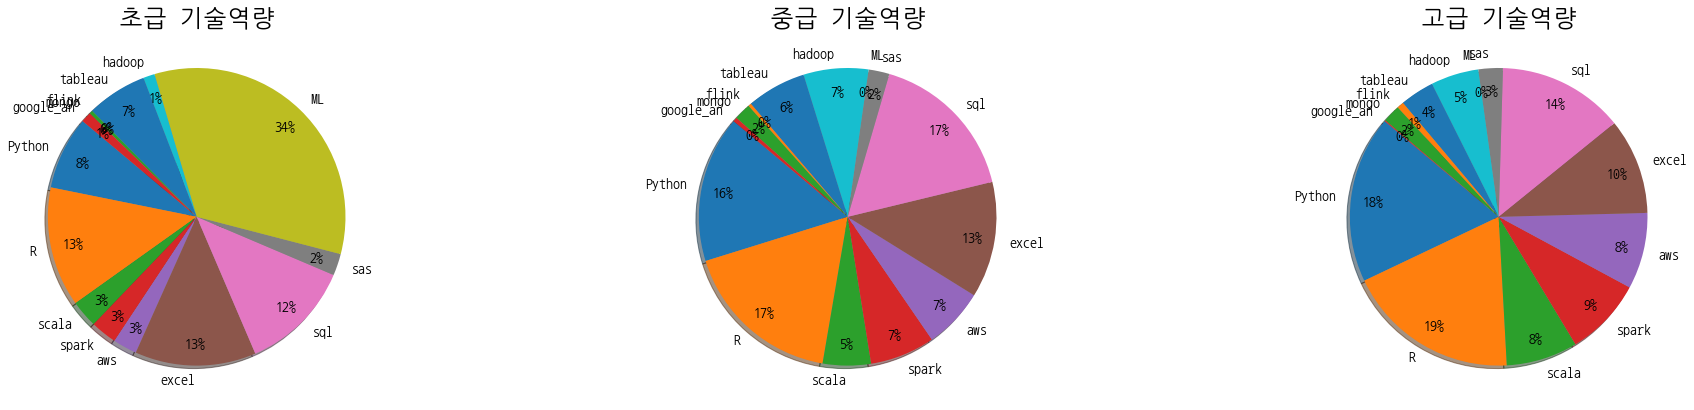

In [73]:
fig, axes = plt.subplots(1, 3,figsize=(30, 20))
labels1=['Python', 'R', 'scala', 'spark', 'aws', 'excel',
       'sql', 'sas', 'ML', 'hadoop', 'tableau', 'flink', 'mongo', 'google_an']
sizes1 =[64, 105, 24, 23, 21, 106, 98, 19, 271, 10, 53, 0, 3, 9]
sizes2 =[140, 154, 46, 62, 58, 111, 147, 20, 0, 62, 57, 3, 16, 4]
sizes3= [171, 177, 73, 80, 78, 98, 129, 25, 0, 49, 35, 7, 18, 1]
axes[0].pie(sizes1, labels=labels1,autopct='%.0f%%',textprops={'fontsize': 14},
                            shadow=True,pctdistance=0.85, startangle=140)
axes[0].set_title('초급 기술역량')
axes[1].pie(sizes2, labels=labels1,autopct='%.0f%%',textprops={'fontsize': 14},
                   shadow=True,pctdistance=0.85,startangle=140 )
axes[1].set_title('중급 기술역량')
axes[2].pie(sizes3, labels=labels1,autopct='%.0f%%',textprops={'fontsize': 14},
                            shadow=True,pctdistance=0.85,startangle=140 )
axes[2].set_title('고급 기술역량')
fig.subplots_adjust(wspace=0.75)

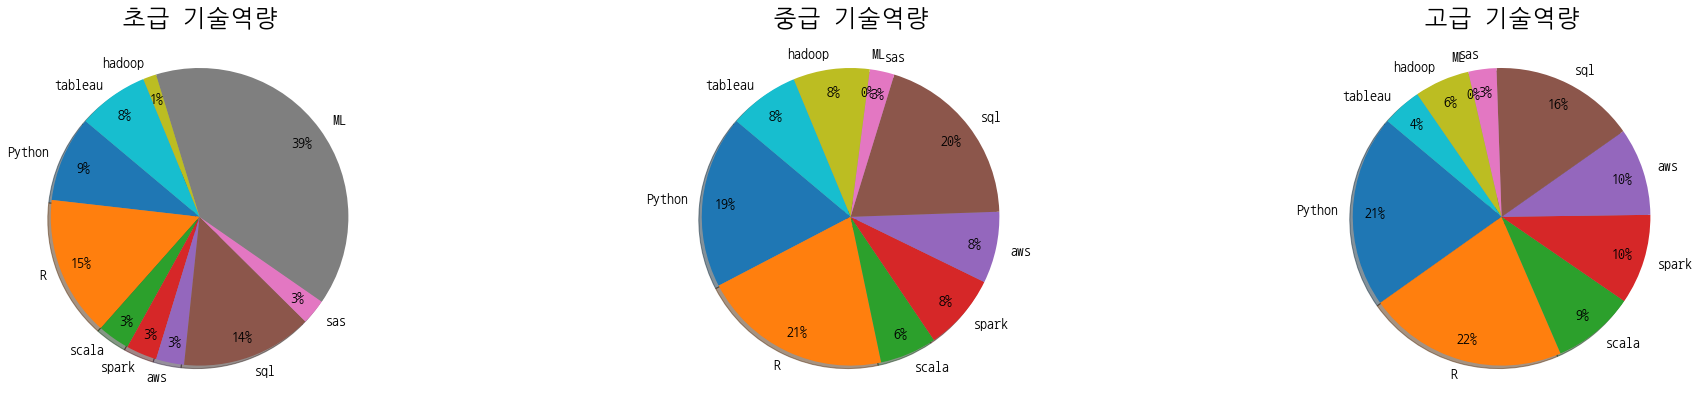

In [74]:
fig, axes = plt.subplots(1, 3,figsize=(30, 20))
labels1=['Python', 'R', 'scala', 'spark', 'aws',
       'sql', 'sas', 'ML', 'hadoop', 'tableau']
sizes1 =[64, 105, 24, 23, 21, 98, 19, 271, 10, 53]
sizes2 =[140, 154, 46, 62, 58, 147, 20, 0, 62, 57]
sizes3= [171, 177, 73, 80, 78, 129, 25, 0, 49, 35]
axes[0].pie(sizes1, labels=labels1,autopct='%.0f%%',textprops={'fontsize': 14},
                            shadow=True,pctdistance=0.85, startangle=140)
axes[0].set_title('초급 기술역량')
axes[1].pie(sizes2, labels=labels1,autopct='%.0f%%',textprops={'fontsize': 14},
                   shadow=True,pctdistance=0.85,startangle=140 )
axes[1].set_title('중급 기술역량')
axes[2].pie(sizes3, labels=labels1,autopct='%.0f%%',textprops={'fontsize': 14},
                            shadow=True,pctdistance=0.85,startangle=140 )
axes[2].set_title('고급 기술역량')
fig.subplots_adjust(wspace=0.75)

In [75]:
salary = datajob.set_index('Queried_Salary')
salary_skill_df= salary.loc[['<80000','80000-99999','100000-119999','120000-139999','140000-159999','>160000'],
          ['Job_Type']]
salary_skill_df
jobtype_groups = salary_skill_df.groupby('Queried_Salary')
job_type_df= jobtype_groups['Job_Type'].value_counts()
df = pd.DataFrame(job_type_df)
#df.reorder_levels(0,("<80000","80000-99999","100000-119999","120000-139999","140000-159999",">160000"))
df.sort_index(ascending = False)

Job_Type
Queried_Salary Job_Type                
>160000        data engineer         20
               Data Scientist       116
               Data Analyst           3
<80000         data engineer          2
               Data Scientist         8
               Data Analyst          59
80000-99999    data engineer         13
               Data Scientist        44
               Data Analyst          29
140000-159999  data engineer         28
               Data Scientist        59
               Data Analyst           3
120000-139999  data engineer         28
               Data Scientist        73
               Data Analyst           7
100000-119999  data engineer         28
               Data Scientist        56
               Data Analyst          13

In [76]:
salary = datajob.set_index('Queried_Salary')
salary_skill_df= salary.loc[['<80000','80000-99999', '100000-119999','120000-139999','140000-159999','>160000'],
          ['Python', 'R', 'scala', 'spark', 'aws', 'excel',
       'sql', 'sas', 'ML', 'hadoop', 'tableau', 'flink', 'mongo', 'google_an']]
salary_groups = salary_skill_df.groupby('Queried_Salary')
sum_salary = salary_groups.sum()
sum_salary['Total Count of Skills']= sum_salary.sum(axis=1)
sum_salary
skills_salary_df = pd.DataFrame({'Queried_Salary':['<80000','80000-99999','100000-119999','120000-139999','140000-159999','>160000'],
                               'Python':[ '62',  '78',  '67',  '46',  '18', '104'],
'R':[ '72',  '82',  '64' , '59',  '46', '113'],
'scala':['28', '18', '31' ,'20'  ,'4' ,'42'],
'spark':['26', '36' ,'34' ,'19' , '4', '46'],
'aws':['20' ,'38', '28', '13' , '8' ,'50'],
'excel':['58', '53', '36' ,'53' ,'53','62'],
'sql':['68', '79' ,'56' ,'55' ,'43' ,'73'],
'sas':[ '6' ,'14'  ,'5' ,'15' , '4', '20'],
'ML':[  '0',   '0' ,  '0' ,'271'  , '0' ,  '0'],
'hadoop':['34', '28', '19' , '8' , '2' ,'30'],
'tableau':['20', '37', '18', '34' ,'19', '17'],
'flink':['0' ,'3', '2', '0' ,'0', '5'],
'mongo':[ '6', '10', '10' , '2',  '1',  '8'],
'google_an':['3', '1' ,'0' ,'0' ,'9', '1']}
                              )
skills_salary_df=skills_salary_df.set_index("Queried_Salary")
skills_salary_df

,Python,R,scala,spark,aws,excel,sql,sas,ML,hadoop,tableau,flink,mongo,google_an
Queried_Salary,,,,,,,,,,,,,,
<80000,62,72,28,26,20,58,68,6,0,34,20,0,6,3
80000-99999,78,82,18,36,38,53,79,14,0,28,37,3,10,1
100000-119999,67,64,31,34,28,36,56,5,0,19,18,2,10,0
120000-139999,46,59,20,19,13,53,55,15,271,8,34,0,2,0
140000-159999,18,46,4,4,8,53,43,4,0,2,19,0,1,9
>160000,104,113,42,46,50,62,73,20,0,30,17,5,8,1


In [77]:
jobs_groups.sum()

,Python,R,scala,spark,aws,excel,sql,sas,ML,hadoop,tableau,flink,mongo,google_an
Job_Type,,,,,,,,,,,,,,
Data Analyst,38,74,15,7,12,85,83,13,26,4,44,0,3,11
Data Scientist,266,278,71,93,91,184,207,50,271,70,93,4,21,3
data engineer,77,92,59,67,59,54,87,1,47,50,11,6,13,0


In [78]:
df_temp = jobs_groups.sum()

In [79]:
df_temp.loc['Data Analyst', :].sort_values(ascending=False).drop('excel').index

Index(['sql', 'R', 'tableau', 'Python', 'ML', 'scala', 'sas', 'aws',
       'google_an', 'spark', 'hadoop', 'mongo', 'flink'],
      dtype='object')

In [80]:
df_temp.loc['Data Analyst', :].sort_values(ascending=False).drop('excel').values.astype(int)

array([83, 74, 44, 38, 26, 15, 13, 12, 11,  7,  4,  3,  0])

In [81]:
top4_ana=pd.DataFrame({"Skills":['sql', 'R', 'tableau', 'Python', 'scala', 'sas', 'aws', 'google_an', 'spark', 'hadoop', 'mongo', 'ML', 'flink'],
                      "Skills for Data Analyst":[83, 74, 44, 38, 15, 13, 12, 11,  7,  4,  3,  0,  0]})
top4_ana=top4_ana.set_index("Skills")
top4_ana

,Skills for Data Analyst
Skills,
sql,83
R,74
tableau,44
Python,38
scala,15
sas,13
aws,12
google_an,11
spark,7


In [82]:
df_temp.loc['data engineer', :].sort_values(ascending=False).drop('excel').index

Index(['R', 'sql', 'Python', 'spark', 'scala', 'aws', 'hadoop', 'ML', 'mongo',
       'tableau', 'flink', 'sas', 'google_an'],
      dtype='object')

In [83]:
df_temp.loc['data engineer', :].sort_values(ascending=False).drop('excel').values.astype(int)

array([92, 87, 77, 67, 59, 59, 50, 47, 13, 11,  6,  1,  0])

In [84]:
top4_eng=pd.DataFrame({"Skills":['R', 'sql', 'Python', 'spark', 'scala', 'aws', 'hadoop', 'mongo', 'tableau', 'flink', 'sas', 'ML', 'google_an'],
                      "Skills for Data Engineer":[92, 87, 77, 67, 59, 59, 50, 13, 11,  6,  1,  0,  0]})
top4_eng=top4_eng.set_index("Skills")
top4_eng

,Skills for Data Engineer
Skills,
R,92
sql,87
Python,77
spark,67
scala,59
aws,59
hadoop,50
mongo,13
tableau,11


In [85]:
df_temp.loc['Data Scientist', :].sort_values(ascending=False).drop('excel').index

Index(['R', 'ML', 'Python', 'sql', 'spark', 'tableau', 'aws', 'scala',
       'hadoop', 'sas', 'mongo', 'flink', 'google_an'],
      dtype='object')

In [86]:
df_temp.loc['Data Scientist', :].sort_values(ascending=False).drop('excel').values.astype(int)

array([278, 271, 266, 207,  93,  93,  91,  71,  70,  50,  21,   4,   3])

In [87]:
top4_sci=pd.DataFrame({"Skills":['R', 'ML', 'Python', 'sql', 'spark', 'tableau', 'aws', 'scala', 'hadoop', 'sas', 'mongo', 'flink', 'google_an'],
                      "Skills for Data Scientist":[278, 271, 266, 207,  93,  93,  91,  71,  70,  50,  21,   4,   3]})
top4_sci=top4_sci.set_index("Skills")
top4_sci

,Skills for Data Scientist
Skills,
R,278
ML,271
Python,266
sql,207
spark,93
tableau,93
aws,91
scala,71
hadoop,70


In [88]:
top_skills=top4_ana.merge(top4_eng,on="Skills")
top_skills=top_skills.merge(top4_sci,on="Skills")
top_skill=pd.DataFrame.transpose(top_skills)
top_skill

Skills,sql,R,tableau,Python,scala,sas,aws,google_an,spark,hadoop,mongo,ML,flink
Skills for Data Analyst,83,74,44,38,15,13,12,11,7,4,3,0,0
Skills for Data Engineer,87,92,11,77,59,1,59,0,67,50,13,0,6
Skills for Data Scientist,207,278,93,266,71,50,91,3,93,70,21,271,4


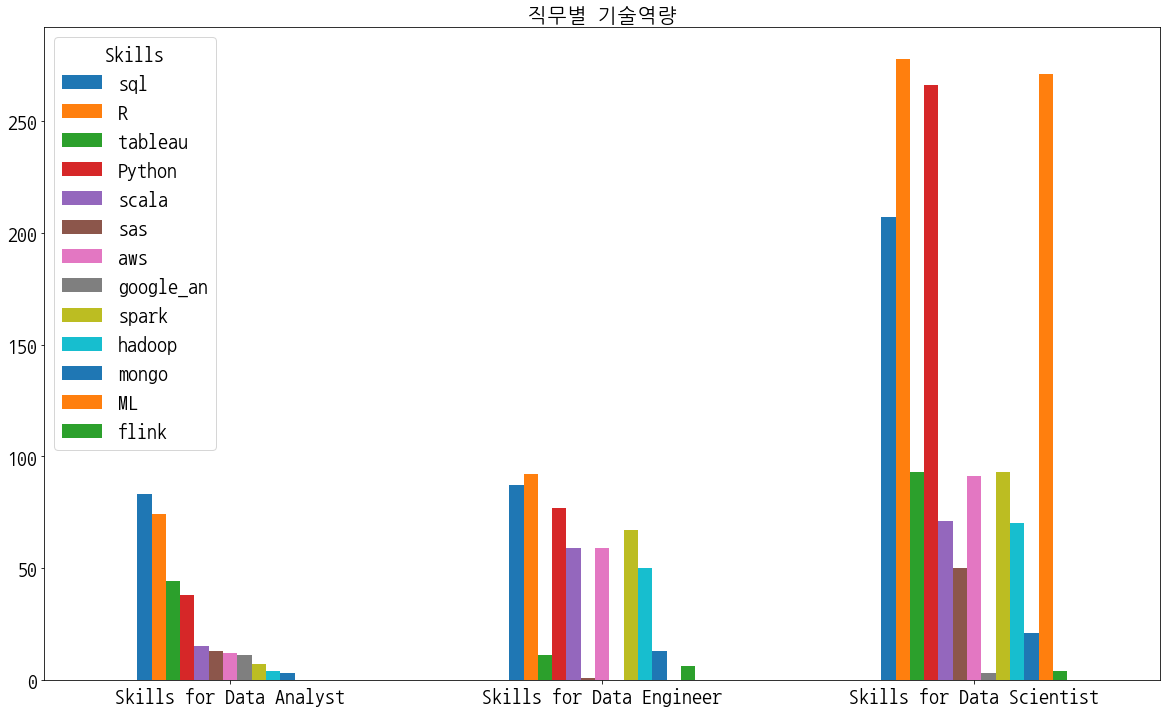

In [89]:
top_skill.plot(kind='bar',figsize=(20,12))
plt.xticks(rotation='horizontal')
plt.title("직무별 기술역량",fontsize=20)
plt.show()

In [90]:
top_skill_jobs = pd.DataFrame({'Job Level':['Entry Level','Mid Level','Senior Level'],
                               "Python":[64, 140, 171],
"R":[105, 154, 177],
"scala":[24, 46, 73],
"spark":[23, 62, 80],
"aws":[21, 58, 78],
"excel":[106, 111, 98],
"sql":[98, 147, 129],
"sas":[19, 20, 25],
"ML":[271, 0, 0],
"hadoop":[10, 62, 49],
"tableau":[53, 57, 35],
"flink":[0, 3, 7],
"mongo":[3, 16, 18],
"google_an":[9, 4, 1] }
                              )
top_skill_jobs=top_skill_jobs.set_index("Job Level")
top_skill_jobs

,Python,R,scala,spark,aws,excel,sql,sas,ML,hadoop,tableau,flink,mongo,google_an
Job Level,,,,,,,,,,,,,,
Entry Level,64,105,24,23,21,106,98,19,271,10,53,0,3,9
Mid Level,140,154,46,62,58,111,147,20,0,62,57,3,16,4
Senior Level,171,177,73,80,78,98,129,25,0,49,35,7,18,1


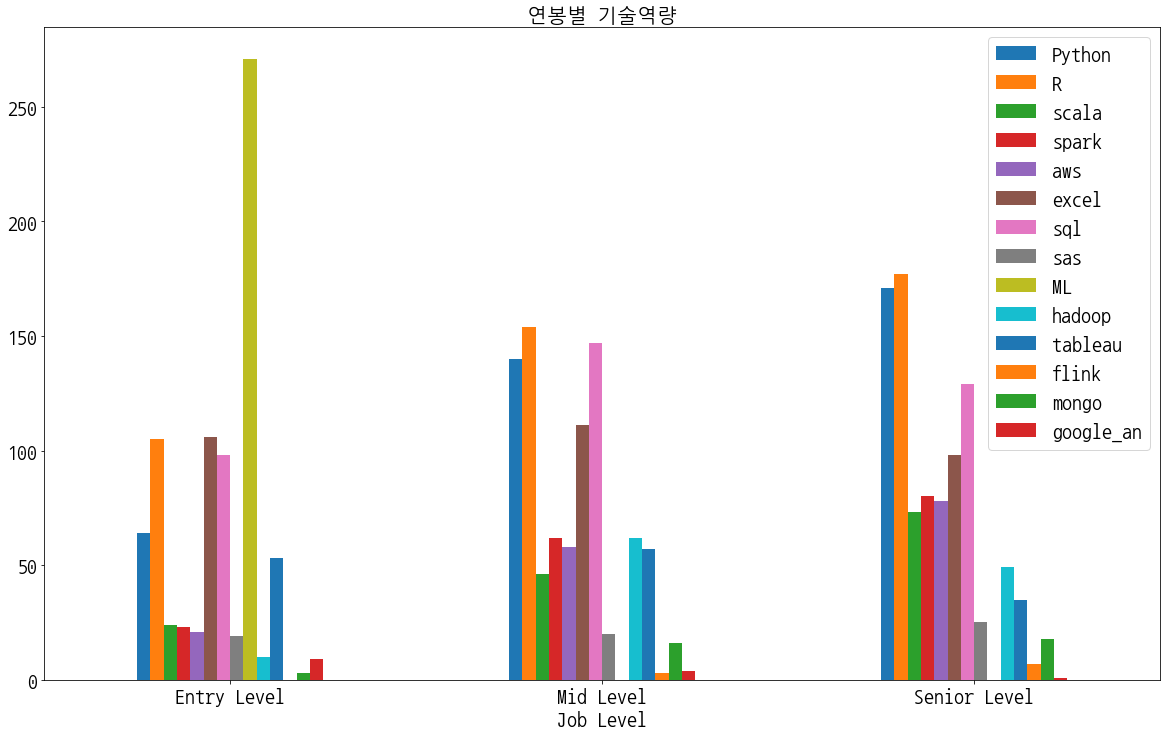

In [91]:
top_skill_jobs.plot(kind='bar',figsize=(20,12))
plt.xticks(rotation='horizontal')
plt.title("연봉별 기술역량",fontsize=20)
plt.plot()
plt.show()

In [92]:
top_skill_jobs

,Python,R,scala,spark,aws,excel,sql,sas,ML,hadoop,tableau,flink,mongo,google_an
Job Level,,,,,,,,,,,,,,
Entry Level,64,105,24,23,21,106,98,19,271,10,53,0,3,9
Mid Level,140,154,46,62,58,111,147,20,0,62,57,3,16,4
Senior Level,171,177,73,80,78,98,129,25,0,49,35,7,18,1


In [93]:
top_skill_jobs.loc['Entry Level', :].nlargest(6)

ML         271
excel      106
R          105
sql         98
Python      64
tableau     53
Name: Entry Level, dtype: int64

In [94]:
top_skill_jobs.loc['Mid Level', :].nlargest(6)

R         154
sql       147
Python    140
excel     111
spark      62
hadoop     62
Name: Mid Level, dtype: int64

In [95]:
top_skill_jobs.loc['Senior Level', :].nlargest(6)

R         177
Python    171
sql       129
excel      98
spark      80
aws        78
Name: Senior Level, dtype: int64

In [96]:
top_skill.loc['Skills for Data Analyst', :].nlargest(6)

Skills
sql        83
R          74
tableau    44
Python     38
scala      15
sas        13
Name: Skills for Data Analyst, dtype: int64

In [97]:
top_skill.loc['Skills for Data Engineer', :].nlargest(6)

Skills
R         92
sql       87
Python    77
spark     67
scala     59
aws       59
Name: Skills for Data Engineer, dtype: int64

In [98]:
top_skill.loc['Skills for Data Scientist', :].nlargest(6)

Skills
R          278
ML         271
Python     266
sql        207
tableau     93
spark       93
Name: Skills for Data Scientist, dtype: int64

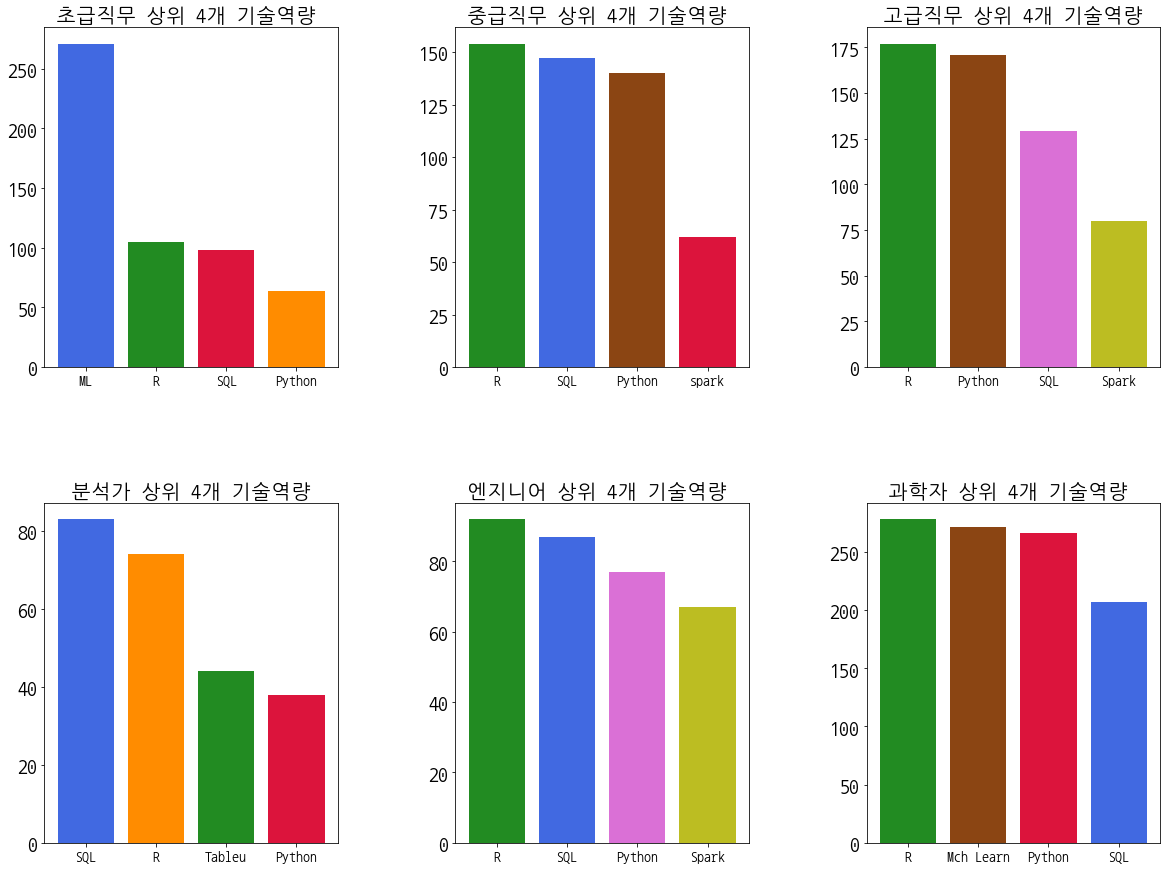

In [99]:
#plt.subplot(figsize=(20, 15))
fig = plt.figure(figsize=(20, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4 )
#’SQL’   ,  ‘Python’,   ‘R’,     ‘Tableu’, ‘Machine Learning’, Hadoop , Spark
#'royalblue’, 'limegreen’, 'crimson’, 'darkorange’,'saddlebrown’, 'orchid’,'tab:olive’
plt.subplot(2,3,1)
entry_skills=[271,105,98,64]
x1 = np.arange(len(entry_skills))
colors1 = ['royalblue', 'forestgreen', 'crimson', 'darkorange']
plt.bar(x1,entry_skills, color= colors1)
plt.xticks(x1, ['ML', 'R', 'SQL','Python',], fontsize = 14)
plt.title('초급직무 상위 4개 기술역량 ', fontsize = 20)
plt.subplot(2,3,2)
mid_skills=[154,147,140,62]
x2 = np.arange(len(mid_skills))
colors2=['forestgreen','royalblue','saddlebrown','crimson']
plt.bar(x1,mid_skills, color = colors2)
plt.xticks(x2, ['R', 'SQL','Python', 'spark'],fontsize = 14)
plt.title('중급직무 상위 4개 기술역량 ', fontsize = 20)
plt.subplot(2,3,3)
senior_skills=[177,171,129,80]
x2 = np.arange(len(senior_skills))
colors3=['forestgreen','saddlebrown','orchid','tab:olive']
plt.bar(x1,senior_skills, color = colors3)
plt.xticks(x2, ['R','Python','SQL', 'Spark'],fontsize = 14)
plt.title('고급직무 상위 4개 기술역량', fontsize = 20)
plt.subplot(2,3,4)

analyst_skills=[83,74,44,38]
x2 = np.arange(len(analyst_skills))
colors4=['royalblue','darkorange','forestgreen','crimson']
plt.bar(x1,analyst_skills,color=colors4)
plt.xticks(x2, ['SQL','R','Tableu', 'Python'],fontsize = 14)
plt.title('분석가 상위 4개 기술역량', fontsize = 20)
plt.subplot(2,3,5)
engineer_skills=[92,87,77,67]
x2 = np.arange(len(engineer_skills))
colors5=['forestgreen','royalblue','orchid','tab:olive']
plt.bar(x1,engineer_skills,color=colors5)
plt.xticks(x2, ['R','SQL','Python','Spark'],fontsize = 14)
plt.title('엔지니어 상위 4개 기술역량 ', fontsize = 20)
plt.subplot(2,3,6)
scientist_skills=[278,271,266,207]
x2 = np.arange(len(scientist_skills))
colors6=['forestgreen','saddlebrown','crimson','royalblue']
plt.bar(x1,scientist_skills,color=colors6)
plt.xticks(x2, ['R','Mch Learn','Python','SQL'],fontsize = 14)
plt.title('과학자 상위 4개 기술역량 ', fontsize = 20)
plt.show()